## Pricing European and Asian options using Monte Carlo simulations

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
S0 = 50        # price of underlying asset today
K = 50         # strike at expiry
mu = 0.04      # expected return
sig = 0.1      # volatility
r = 0.03       # risk-free rate
dt = 1/365.0   # time steps
etime = 50     # days to expiry
T = dt*etime   # years to expiry

Number of simulated paths (Monte Carlo scenarios)

In [3]:
nruns = 10000

Simulate asset paths for the geometric random walk

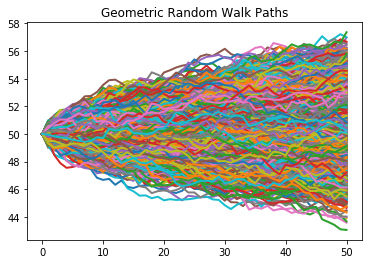

In [4]:
def GRWPaths(initPrice, mu, sigma, T, numSteps, numPaths):
    """
    Computes numPaths random paths for a geometric random walk.
    
    Args:
        mu: is the annual drift, sigma the annual volatility;
        T: is the total length of time for the path (in years).
    Returns:
        random paths for a geometric random walk.
    """   
    paths = np.zeros((numSteps + 1, numPaths));
    
    # dT is the time increment (in years)
    dT = T / numSteps
    
    # Vector of paths will store realizations of the asset price
    # First asset price is the initial price
    paths[0] = [initPrice] * numPaths
 
    # Generate paths
    for iPath in range(numPaths):
        for iStep in range(numSteps):
            paths[iStep + 1, iPath] = paths[iStep, iPath] * np.exp((mu - 0.5 * sigma ** 2) * dT 
                                                                   + sigma * np.sqrt(dT) * np.random.normal(0,1));
    
    # Plot paths
    [plt.plot(paths[:,i], linewidth=2) for i in range(numPaths)]
    plt.title('Geometric Random Walk Paths')
    return paths

S = GRWPaths(S0, mu, sig, T, etime, nruns)

Calculate the payoff for each path for a Put

In [5]:
# European option
EPutPayoffT = np.maximum(K - S[-1,:], 0)

In [6]:
# Asian option
APutPayoffT = np.maximum(K - np.mean(S,axis=0), 0)

Calculate the payoff for each path for a Call

In [7]:
# European option
ECallPayoffT = np.maximum(S[-1,:] - K, 0)

In [8]:
# Asian option
ACallPayoffT = np.maximum(np.mean(S,axis=0) - K, 0)

Discount back to time 0 and calculate price/value for 1 unit of option

In [9]:
AputPrice = np.mean(APutPayoffT) * np.exp(-r * T)
AcallPrice = np.mean(ACallPayoffT) * np.exp(-r * T)

In [10]:
print(" Asian put option price/value at t0: ${0:.2f}".format(AputPrice))
print("Asian call option price/value at t0: ${0:.2f}".format(AcallPrice))

 Asian put option price/value at t0: $0.35
Asian call option price/value at t0: $0.50


In [11]:
EputPrice = np.mean(EPutPayoffT) * np.exp(-r * T)
EcallPrice = np.mean(ECallPayoffT) * np.exp(-r * T)

In [12]:
print(" European put option price/value at t0: ${0:.2f}".format(EputPrice))
print("European call option price/value at t0: ${0:.2f}".format(EcallPrice))

 European put option price/value at t0: $0.60
European call option price/value at t0: $0.89


Model distribution of portfolio with 100 units of European put option at 30-day timestep

In [13]:
# Value portfolio of 100 units of European option at time t=30 days
t_val = 30
Tval = (etime-t_val)*dt # discount to 30 days from 50 days

In [14]:
# number of position units
Nunits = 100

In [15]:
# calculate value for 1 unit of option
EputVal = EPutPayoffT * np.exp(-r * Tval)

In [16]:
# calculate portfolio value at t=30
v30 = Nunits * EputVal

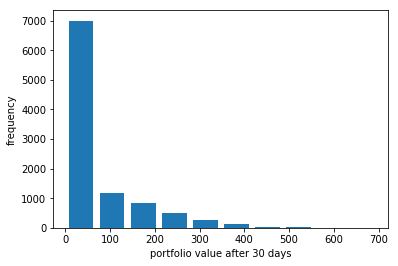

In [17]:
# plot portfolio value distribution
hist, bins = np.histogram(v30)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 days')
plt.ylabel('frequency')
plt.show()